# `Project Overview`

This project focuses on classifying emails into **Spam** or **Ham** (Not Spam).
NLP techniques are used for cleaning and preprocessing the email text data, and the final classification is performed using the **Multinomial Naive Bayes** algorithm.

# `Imporitng Libraries`

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords 
from nltk.stem import SnowballStemmer

import re

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# `Cleaning the Data`

In [2]:
data = pd.read_csv("Data/Spam_or_Ham_Dataset.txt",
                  sep = '\t',
                  names = ["Label","Message"])

In [3]:
data.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
data.shape

(5572, 2)

In [5]:
snowball_stemmer = SnowballStemmer('english')

stop_words = set(stopwords.words('english'))

In [6]:
messages = []

for i in range(len(data)):
    sentence = re.sub('[^a-zA-Z]', ' ', data["Message"][i])
    
    sentence = sentence.lower()
    sentence = sentence.split()

    sentence = [snowball_stemmer.stem(word) for word in sentence if word not in stop_words]

    sentence = ' '.join(sentence)

    messages.append(sentence)

In [7]:
messages[:4]

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkts st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say']

# `Creating Bag Of Words / Feature Extraction`

In [8]:
y = pd.get_dummies(data = data['Label'], drop_first = True)

In [9]:
y = np.array(y).ravel()

In [10]:
y

array([False, False,  True, ..., False, False, False])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(messages, y, test_size = 0.2, random_state = 42)

In [12]:
# Creating a object
count_vectorizer = CountVectorizer(max_features = 2000, ngram_range = (1,3))

In [13]:
X_train = count_vectorizer.fit_transform(X_train).toarray()
X_test = count_vectorizer.transform(X_test).toarray()

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4457, 2000), (1115, 2000), (4457,), (1115,))

# `Building a Model`

In [15]:
# Building a naive_baeys Model

multinomialNB_model = MultinomialNB()

In [16]:
# Fitting the Data to the Model

multinomialNB_model.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


# `Model Performance`

In [17]:
# Predicting the Test Data

y_preds = multinomialNB_model.predict(X_test)

In [18]:
# Getting the Accuracy Score

acc = accuracy_score(y_test, y_preds)
print(f"The Accuracy is : {acc}")

The Accuracy is : 0.9838565022421525


In [19]:
# Getting the Classification Report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

       False       0.99      0.99      0.99       966
        True       0.96      0.91      0.94       149

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



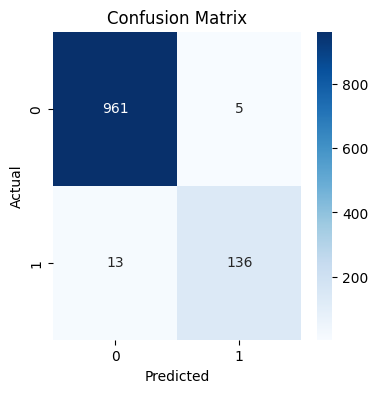

In [20]:
# Visulaizing the Confusion Matrix

cm = confusion_matrix(y_test, y_preds)

plt.figure(figsize = (4,4))
sns.heatmap(cm, annot = True, cmap = "Blues", fmt = 'd')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()